## $\textbf{Inferring Musical Time Signature via Apple Watch Logs of Conductor Wrist Motion}$

$\textbf{Author:}\text{ Ryan Burns}$

$\text{This notebook is dedicated to analysis of componentwise cross-correlation (across IMU sensors) as input feature to deep learning classifiers.}$

$\textbf{Motion Class Labels:}$

$\text{All class labels are defined for a right-handed user. An orchestral conductor varies their baton pattern according to 1 of 4 possible states, }$
$\text{comprised of 3 time signature classes and a resting class (i.e., cessation of baton motion).}$

$\text{0 }\leftrightarrow [1\enspace0\enspace0\enspace0]\leftrightarrow \text{REST}\Longrightarrow\text{conductor has ceased baton motion (no conducting)}$

$\text{1 }\leftrightarrow [0\enspace1\enspace0\enspace0]\leftrightarrow {2/4}\Longrightarrow\text{conductor proceeds with baton motion consistent with a }\mathbf{\genfrac{}{}{0pt}{}{2}{4}}\text{ time signature}$

$\text{2 }\leftrightarrow [0\enspace0\enspace1\enspace0]\leftrightarrow {3/4}\Longrightarrow\text{conductor proceeds with baton motion consistent with a }\mathbf{\genfrac{}{}{0pt}{}{3}{4}}\text{ time signature}$

$\text{3 }\leftrightarrow [0\enspace0\enspace0\enspace1]\leftrightarrow {4/4}\Longrightarrow\text{conductor proceeds with baton motion consistent with a }\mathbf{\genfrac{}{}{0pt}{}{4}{4}}\text{ time signature}$

$\text{For more information on musical time signatures, visit: }\textit{https://en.wikipedia.org/wiki/Time_signature}.$

![title](baton_motion.png)

$\text{The baton patterns for each time signature of interest are depicted diagramatically above. We assume a tech enthusiast conductor who desires}$
$\text{an Apple Watch app/experience for automatic discrimination between the 3 time signatures above, in addition to a catch-all }\textit{at-rest}\text{ state. We }$
$\text{also assume that this conductor would like automatic time-signature inference to be as tempo-agnostic as possible. Be it }\textit{largo}\text{ or }\textit{prestissimo}\text{,}$
$\text{we assume that the tempo of the musical composition of question would not fool the ideal baton pattern classifier. As such, while the amount}$
$\text{of data collected for this analysis is still limited in its size and diversity (i.e., we can assume overfit models), efforts have been made during}$
$\text{data collection to vary the tempo across each time signature's constituent wrist motion observations. The duration (in seconds or measures)}$
$\text{of each time signature's wrist motion subsequence is also varied during collection. We create an aggregated dataset of independent concatenated}$
$\text{collects for supervised learning in the code below.}$

$\textbf{Note On Labeling:}$

$\text{SensorLog labels are recorded in real time using the app's class label buttons for a streaming iPhone. This iPhone logs data concurrently with}$
$\text{an Apple Watch, which also reports its own class labels. Since toggling of the Apple Watch's class labels using the SensorLog UI on the watch }$
$\text{face would interfere with data collection of wrist motion, we use the }\textit{iPhone}\text{ to log wrist motion labels. By time-aligning the iPhone and Apple}$
$\text{Watch streams below (i.e., using POSIX timestamps), we can readily provide wrist motion labels for the Apple Watch motion signals without}$
$\text{interfering with their trajectory as just described. In short, real-time motion labeling is available through dual stream of Apple Watch }$
$\text{iPhone data, where the former provides the motion observations of interest and the latter provides a mechanism for real-time motion labeling.}$

$\text{We add Gaussian noise to the input signals to randomly vary input to the network, in addition to applying random dropout to a subset of}$
$\text{the connections within the network at a fixed probability. The model is trained on a subset of data and validated on the remaining data.}$

$\textbf{Motion Class Labels:}$

$\text{All class labels are defined for a right-handed user. An orchestral conductor varies their baton pattern according to 1 of 4 possible states, }$
$\text{comprised of 3 time signature classes and a resting class (i.e., cessation of baton motion).}$

$\text{0 }\leftrightarrow [1\enspace0\enspace0\enspace0]\leftrightarrow \text{REST}\Longrightarrow\text{conductor has ceased baton motion (no conducting)}$

$\text{1 }\leftrightarrow [0\enspace1\enspace0\enspace0]\leftrightarrow {2/4}\Longrightarrow\text{conductor proceeds with baton motion consistent with a }\mathbf{\genfrac{}{}{0pt}{}{2}{4}}\text{ time signature}$

$\text{2 }\leftrightarrow [0\enspace0\enspace1\enspace0]\leftrightarrow {3/4}\Longrightarrow\text{conductor proceeds with baton motion consistent with a }\mathbf{\genfrac{}{}{0pt}{}{3}{4}}\text{ time signature}$

$\text{3 }\leftrightarrow [0\enspace0\enspace0\enspace1]\leftrightarrow {4/4}\Longrightarrow\text{conductor proceeds with baton motion consistent with a }\mathbf{\genfrac{}{}{0pt}{}{4}{4}}\text{ time signature}$

$\text{For more information on musical time signatures, visit: }\textit{https://en.wikipedia.org/wiki/Time_signature}.$

![title](baton_motion.png)

$\text{The baton patterns for each time signature of interest are depicted diagramatically above. We assume a tech enthusiast conductor who desires}$
$\text{an Apple Watch app/experience for automatic discrimination between the 3 time signatures above, in addition to a catch-all }\textit{at-rest}\text{ state. We }$
$\text{also assume that this conductor would like automatic time-signature inference to be as tempo-agnostic as possible. Be it }\textit{largo}\text{ or }\textit{prestissimo}\text{,}$
$\text{we assume that the tempo of the musical composition of question would not fool the ideal baton pattern classifier. As such, while the amount}$
$\text{of data collected for this analysis is still limited in its size and diversity (i.e., we can assume overfit models), efforts have been made during}$
$\text{data collection to vary the tempo across each time signature's constituent wrist motion observations. The duration (in seconds or measures)}$
$\text{of each time signature's wrist motion subsequence is also varied during collection. We create an aggregated dataset of independent concatenated}$
$\text{collects for supervised learning in the code below.}$

$\textbf{Note On Labeling:}$

$\text{SensorLog labels are recorded in real time using the app's class label buttons for a streaming iPhone. This iPhone logs data concurrently with}$
$\text{an Apple Watch, which also reports its own class labels. Since toggling of the Apple Watch's class labels using the SensorLog UI on the watch }$
$\text{face would interfere with data collection of wrist motion, we use the }\textit{iPhone}\text{ to log wrist motion labels. By time-aligning the iPhone and Apple}$
$\text{Watch streams below (i.e., using POSIX timestamps), we can readily provide wrist motion labels for the Apple Watch motion signals without}$
$\text{interfering with their trajectory as just described. In short, real-time motion labeling is available through dual stream of Apple Watch }$
$\text{iPhone data, where the former provides the motion observations of interest and the latter provides a mechanism for real-time motion labeling.}$

### $\textbf{Import Packages}$

In [1]:
import pandas as pd
from os import getcwd, environ;
from itertools import product as iter_prod;
from matplotlib import pyplot as plt;
from mpl_toolkits.axes_grid1 import make_axes_locatable
from numpy import array, hstack, argmax, ones, zeros, log10;
from numpy import logical_or, logical_not, expand_dims, flip;
from numpy import  abs, arange, shape, newaxis, sum, flipud;
from numpy import nan_to_num, transpose;
from scipy.signal import spectrogram;

from tensorflow.keras.models import Sequential, Model;
from tensorflow.keras.optimizers import RMSprop;
from tensorflow.keras.metrics import CategoricalAccuracy;
from tensorflow.keras.metrics import Precision, Recall, AUC;
from tensorflow.keras.layers import Dropout, LSTM, Dense, Conv2D;
from tensorflow.keras.layers import Activation, Reshape, Conv1D;
from tensorflow.keras.layers import Input, GaussianNoise, ConvLSTM2D;
from sklearn.metrics import confusion_matrix;

from SensorLogUtils import convert_iPhone_units;

environ['KMP_DUPLICATE_LIB_OK']='True'

### $\textbf{Class Label Definitions}$

In [2]:
# Ordinal motion class labels
class_table = pd.DataFrame({
    'REST': {
        'id': 'REST', 
        'description': 'no conducting / baton pattern',
        '1-hot label': [1,0,0,0],
        'ordinal label': 0
    },
    '2/4': {
        'id': '2/4', 
        'description': 'conducting pattern for a 2/4 time signature',
        '1-hot label': [0,1,0,0],
        'ordinal label': 1
    },
    '3/4': {
        'id': '3/4', 
        'description':'conducting pattern for a 3/4 time signature',
        '1-hot label': [0,0,1,0],
        'ordinal label': 2
    },
    '4/4': {
        'id': '4/4', 
        'description':'conducting pattern for a 4/4 time signature',
        '1-hot label': [0,0,0,1],
        'ordinal label': 3
    }
});

# Number of classes
C = 4;

# Print class table
class_table

,REST,2/4,3/4,4/4
id,REST,2/4,3/4,4/4
description,no conducting / baton pattern,conducting pattern for a 2/4 time signature,conducting pattern for a 3/4 time signature,conducting pattern for a 4/4 time signature
1-hot label,"[1, 0, 0, 0]","[0, 1, 0, 0]","[0, 0, 1, 0]","[0, 0, 0, 1]"
ordinal label,0,1,2,3


### $\textbf{Specify & Load Dataset}$

In [3]:
################
# Specify data #
################

# Specify local data storage path
data_path = getcwd() + '/data';

# Collect file string ID
collect_IDs = [
    'time_signatures_collect1',
    'time_signatures_collect2'
];

# Build string filename corresponding to collect_ID
collect_files = [
    (data_path + '/labeled_' + collect_ID + '_appleWatch.csv')
for collect_ID in collect_IDs];

#############
# Load data #
#############

# Load and concatenate dataframes for all
# labeled collects in list collect_IDs
df = pd.concat([pd.read_csv(f, 
    error_bad_lines=False,
    warn_bad_lines=False)
    for f in collect_files
],axis=0,ignore_index=True);

# Data fields (column headers)
fields = [fd for fd in df];

# Length of dataframe
N = len(df); # (samples)

### $\textbf{Select IMU Data & 1-Hot Class Labels}$

In [4]:
# Select input signals
x = nan_to_num(array(df[[
    'accelerometerAccelerationX(m/s^2)',
    'accelerometerAccelerationY(m/s^2)',
    'accelerometerAccelerationZ(m/s^2)',
    'motionRotationRateX(rad/s)',
    'motionRotationRateY(rad/s)',
    'motionRotationRateZ(rad/s)'
]]));

# Define 1-hot labels
y = nan_to_num(array(df[[
    
    # List all class headers in table above
    class_name for class_name in class_table
]]));

### $\textbf{Specify Sliding Observation Window Parameters}$

In [5]:
# Number of raw sensor samples (N)
# and their dimensionality (D)
N, D = shape(x);

# Sliding obs. window length
M = 128; # (samples)

# Step size of obs. window
m = 5;  # (samples)

# Linear grid for sliding observation
# window reflecting window length & step
# size specified above, mapped to raw
# sensor samples n = M, M + m, M + 2m, ...
obs_idx = [n for n in range(M,N,m)];

### $\textbf{Define Observations & Class Labels}$

In [6]:
# Windowed spectrogram observation sequence input to model
# X = array([
#     hstack(tuple(spectrogram(x[(n - M):n,d],
#     window='parzen',fs=100,nperseg=32,nfft=64)[2] 
#     for d in range(D))) for n in obs_idx
# ]);
from numpy import correlate
X = array([transpose([correlate(x[(n - M):n,d1],
    x[(n - M):n,d2],'full') for d1 in range(D) for d2 in range(D)]) for n in obs_idx
]);


# Overwrite N,M,D with new dimensionality
N,M,D = shape(X);

# Ground truth 1-hot window-resolution class labels
Y = array([
    [1 if c == argmax(sum(y[(n - M):n,:],0)) 
    else 0 for c in range(C)] for n in obs_idx]);

### $\textbf{Training Parameters}$

In [7]:
# Fraction of dataset to hold 
# out for model validation
pct_validation = 0.25;

# Total number of obs.
N_obs = len(X);

# Number of training epochs
N_epoch = 250;

# Number of batches
N_batch = int(N_obs / 3);

### $\textbf{Define Machine Learning Model}$

In [8]:
#####################################################
# Define model architecture w/ Keras functional API #
#####################################################

# Input layer - M x D observation window
input_layer = Input((M,D));

# Add Gaussian noise to M x D input
h0 = GaussianNoise(1e-4)(input_layer);
h1 = Conv1D(filters=D,kernel_size=D,
            activation='relu')(h0);
# h2 = Reshape((M*36,))(Dense(D,
#     activation='tanh')(h1));
# h3 = Dropout(0.5)(h2);
h2 = Conv1D(filters=D,kernel_size=32,
           activation='tanh')(h1);
h3 = LSTM(32,dropout=0.4,
    recurrent_dropout=0.4,
    activation='tanh')(h2);

# Output layer - C x 1 softmax class activation 
output_layer = Dense(C,activation='softmax')(h3);

# Set up Keras Model() instance
model = Model(
    inputs=input_layer,  # Model inputs
    outputs=output_layer # Model outputs
);

###########################
# Define loss & optimizer #
###########################

# Set RMSprop optimization for 
# speed-of-convergence purposes
opt = RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.001,
    epsilon=1e-07,
    name="RMSprop"
);

# Model compilation, using categorical
# cross-entropy error w/ RMSprop
model.compile(
    
    # Error/loss function
    loss='categorical_crossentropy', 
    
    # Use RMSprop
    optimizer=opt,
    
    # List metrics here
    metrics=[
        CategoricalAccuracy(),
        AUC(),
        Precision(),
        Recall()
    ]
);

# Print a summary table
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 255, 36)]         0         
_________________________________________________________________
gaussian_noise (GaussianNois (None, 255, 36)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 220, 36)           46692     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 189, 36)           41508     
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8832      
_________________________________________________________________
dense (Dense)                (None, 4)                 132       
Total params: 97,164
Trainable params: 97,164
Non-trainable params: 0
_________________________________________________________

### $\textbf{Train Machine Learning Model}$

In [9]:
# Model training
model.fit(
    
    # Input dataset
    x=X, # windowed observations
    y=Y, # 1-hot motion class labels
    
    # Batch size
    batch_size=N_batch,
    
    # Number of training epochs
    epochs=N_epoch,
    
    # Print progress
    verbose=1,
    
    # Set aside fraction for validation
    validation_split=pct_validation,
    
    # False for time series
    shuffle=False,
    
    # Other misc params
    sample_weight=None,
    validation_freq=1,
    max_queue_size=10,
    
    # Parallelize job across 2 workers
    workers=2,
    use_multiprocessing=True
);

Train on 12312 samples, validate on 4104 samples
Epoch 1/250
12312/12312 [==============================] - 36s 3ms/sample - loss: 1.4207 - categorical_accuracy: 0.2766 - auc: 0.5332 - precision: 0.3345 - recall: 0.0075 - val_loss: 1.2809 - val_categorical_accuracy: 0.3475 - val_auc: 0.6691 - val_precision: 0.5695 - val_recall: 0.1628
Epoch 2/250
12312/12312 [==============================] - 32s 3ms/sample - loss: 1.3038 - categorical_accuracy: 0.4080 - auc: 0.6565 - precision: 0.5527 - recall: 0.0507 - val_loss: 1.0581 - val_categorical_accuracy: 0.7061 - val_auc: 0.8557 - val_precision: 0.8706 - val_recall: 0.1213
Epoch 3/250
12312/12312 [==============================] - 32s 3ms/sample - loss: 1.1569 - categorical_accuracy: 0.5190 - auc: 0.7753 - precision: 0.7065 - recall: 0.0964 - val_loss: 1.0415 - val_categorical_accuracy: 0.5261 - val_auc: 0.8130 - val_precision: 0.5735 - val_recall: 0.3784
Epoch 4/250
12312/12312 [==============================] - 32s 3ms/sample - loss: 1.186

12312/12312 [==============================] - 32s 3ms/sample - loss: 0.2591 - categorical_accuracy: 0.9202 - auc: 0.9851 - precision: 0.9232 - recall: 0.9168 - val_loss: 0.3135 - val_categorical_accuracy: 0.9106 - val_auc: 0.9775 - val_precision: 0.9124 - val_recall: 0.9106
Epoch 58/250
12312/12312 [==============================] - 32s 3ms/sample - loss: 0.2602 - categorical_accuracy: 0.9205 - auc: 0.9849 - precision: 0.9250 - recall: 0.9163 - val_loss: 0.3218 - val_categorical_accuracy: 0.9062 - val_auc: 0.9771 - val_precision: 0.9075 - val_recall: 0.9057
Epoch 59/250
12312/12312 [==============================] - 32s 3ms/sample - loss: 0.2594 - categorical_accuracy: 0.9198 - auc: 0.9852 - precision: 0.9238 - recall: 0.9151 - val_loss: 0.3675 - val_categorical_accuracy: 0.8874 - val_auc: 0.9713 - val_precision: 0.8899 - val_recall: 0.8865
Epoch 60/250
12312/12312 [==============================] - 32s 3ms/sample - loss: 0.3348 - categorical_accuracy: 0.8924 - auc: 0.9779 - precision

12312/12312 [==============================] - 32s 3ms/sample - loss: 0.2941 - categorical_accuracy: 0.9074 - auc: 0.9812 - precision: 0.9114 - recall: 0.9040 - val_loss: 0.3702 - val_categorical_accuracy: 0.8960 - val_auc: 0.9752 - val_precision: 0.8980 - val_recall: 0.8950
Epoch 114/250
12312/12312 [==============================] - 32s 3ms/sample - loss: 0.2559 - categorical_accuracy: 0.9166 - auc: 0.9865 - precision: 0.9190 - recall: 0.9136 - val_loss: 0.3679 - val_categorical_accuracy: 0.8916 - val_auc: 0.9751 - val_precision: 0.8944 - val_recall: 0.8894
Epoch 115/250
12312/12312 [==============================] - 32s 3ms/sample - loss: 0.2361 - categorical_accuracy: 0.9245 - auc: 0.9882 - precision: 0.9271 - recall: 0.9223 - val_loss: 0.3366 - val_categorical_accuracy: 0.9077 - val_auc: 0.9771 - val_precision: 0.9096 - val_recall: 0.9067
Epoch 116/250
12312/12312 [==============================] - 32s 3ms/sample - loss: 0.2295 - categorical_accuracy: 0.9267 - auc: 0.9885 - precis

12312/12312 [==============================] - 32s 3ms/sample - loss: 0.1982 - categorical_accuracy: 0.9392 - auc: 0.9910 - precision: 0.9412 - recall: 0.9375 - val_loss: 0.3124 - val_categorical_accuracy: 0.9211 - val_auc: 0.9772 - val_precision: 0.9215 - val_recall: 0.9206
Epoch 170/250
12312/12312 [==============================] - 32s 3ms/sample - loss: 0.2025 - categorical_accuracy: 0.9372 - auc: 0.9908 - precision: 0.9395 - recall: 0.9351 - val_loss: 0.2980 - val_categorical_accuracy: 0.9208 - val_auc: 0.9789 - val_precision: 0.9214 - val_recall: 0.9198
Epoch 171/250
12312/12312 [==============================] - 32s 3ms/sample - loss: 0.1909 - categorical_accuracy: 0.9400 - auc: 0.9914 - precision: 0.9421 - recall: 0.9380 - val_loss: 0.3061 - val_categorical_accuracy: 0.9130 - val_auc: 0.9785 - val_precision: 0.9138 - val_recall: 0.9120
Epoch 172/250
12312/12312 [==============================] - 32s 3ms/sample - loss: 0.2008 - categorical_accuracy: 0.9357 - auc: 0.9906 - precis

12312/12312 [==============================] - 32s 3ms/sample - loss: 0.1808 - categorical_accuracy: 0.9470 - auc: 0.9916 - precision: 0.9488 - recall: 0.9443 - val_loss: 0.3535 - val_categorical_accuracy: 0.9108 - val_auc: 0.9769 - val_precision: 0.9116 - val_recall: 0.9098
Epoch 226/250
12312/12312 [==============================] - 32s 3ms/sample - loss: 0.1792 - categorical_accuracy: 0.9475 - auc: 0.9919 - precision: 0.9500 - recall: 0.9450 - val_loss: 0.3686 - val_categorical_accuracy: 0.9008 - val_auc: 0.9789 - val_precision: 0.9019 - val_recall: 0.9003
Epoch 227/250
12312/12312 [==============================] - 32s 3ms/sample - loss: 0.2130 - categorical_accuracy: 0.9315 - auc: 0.9904 - precision: 0.9339 - recall: 0.9290 - val_loss: 0.3635 - val_categorical_accuracy: 0.8984 - val_auc: 0.9783 - val_precision: 0.9007 - val_recall: 0.8969
Epoch 228/250
12312/12312 [==============================] - 32s 3ms/sample - loss: 0.1809 - categorical_accuracy: 0.9418 - auc: 0.9924 - precis

### $\textbf{Metrics vs. Training Epoch}$

<IPython.core.display.Javascript object>


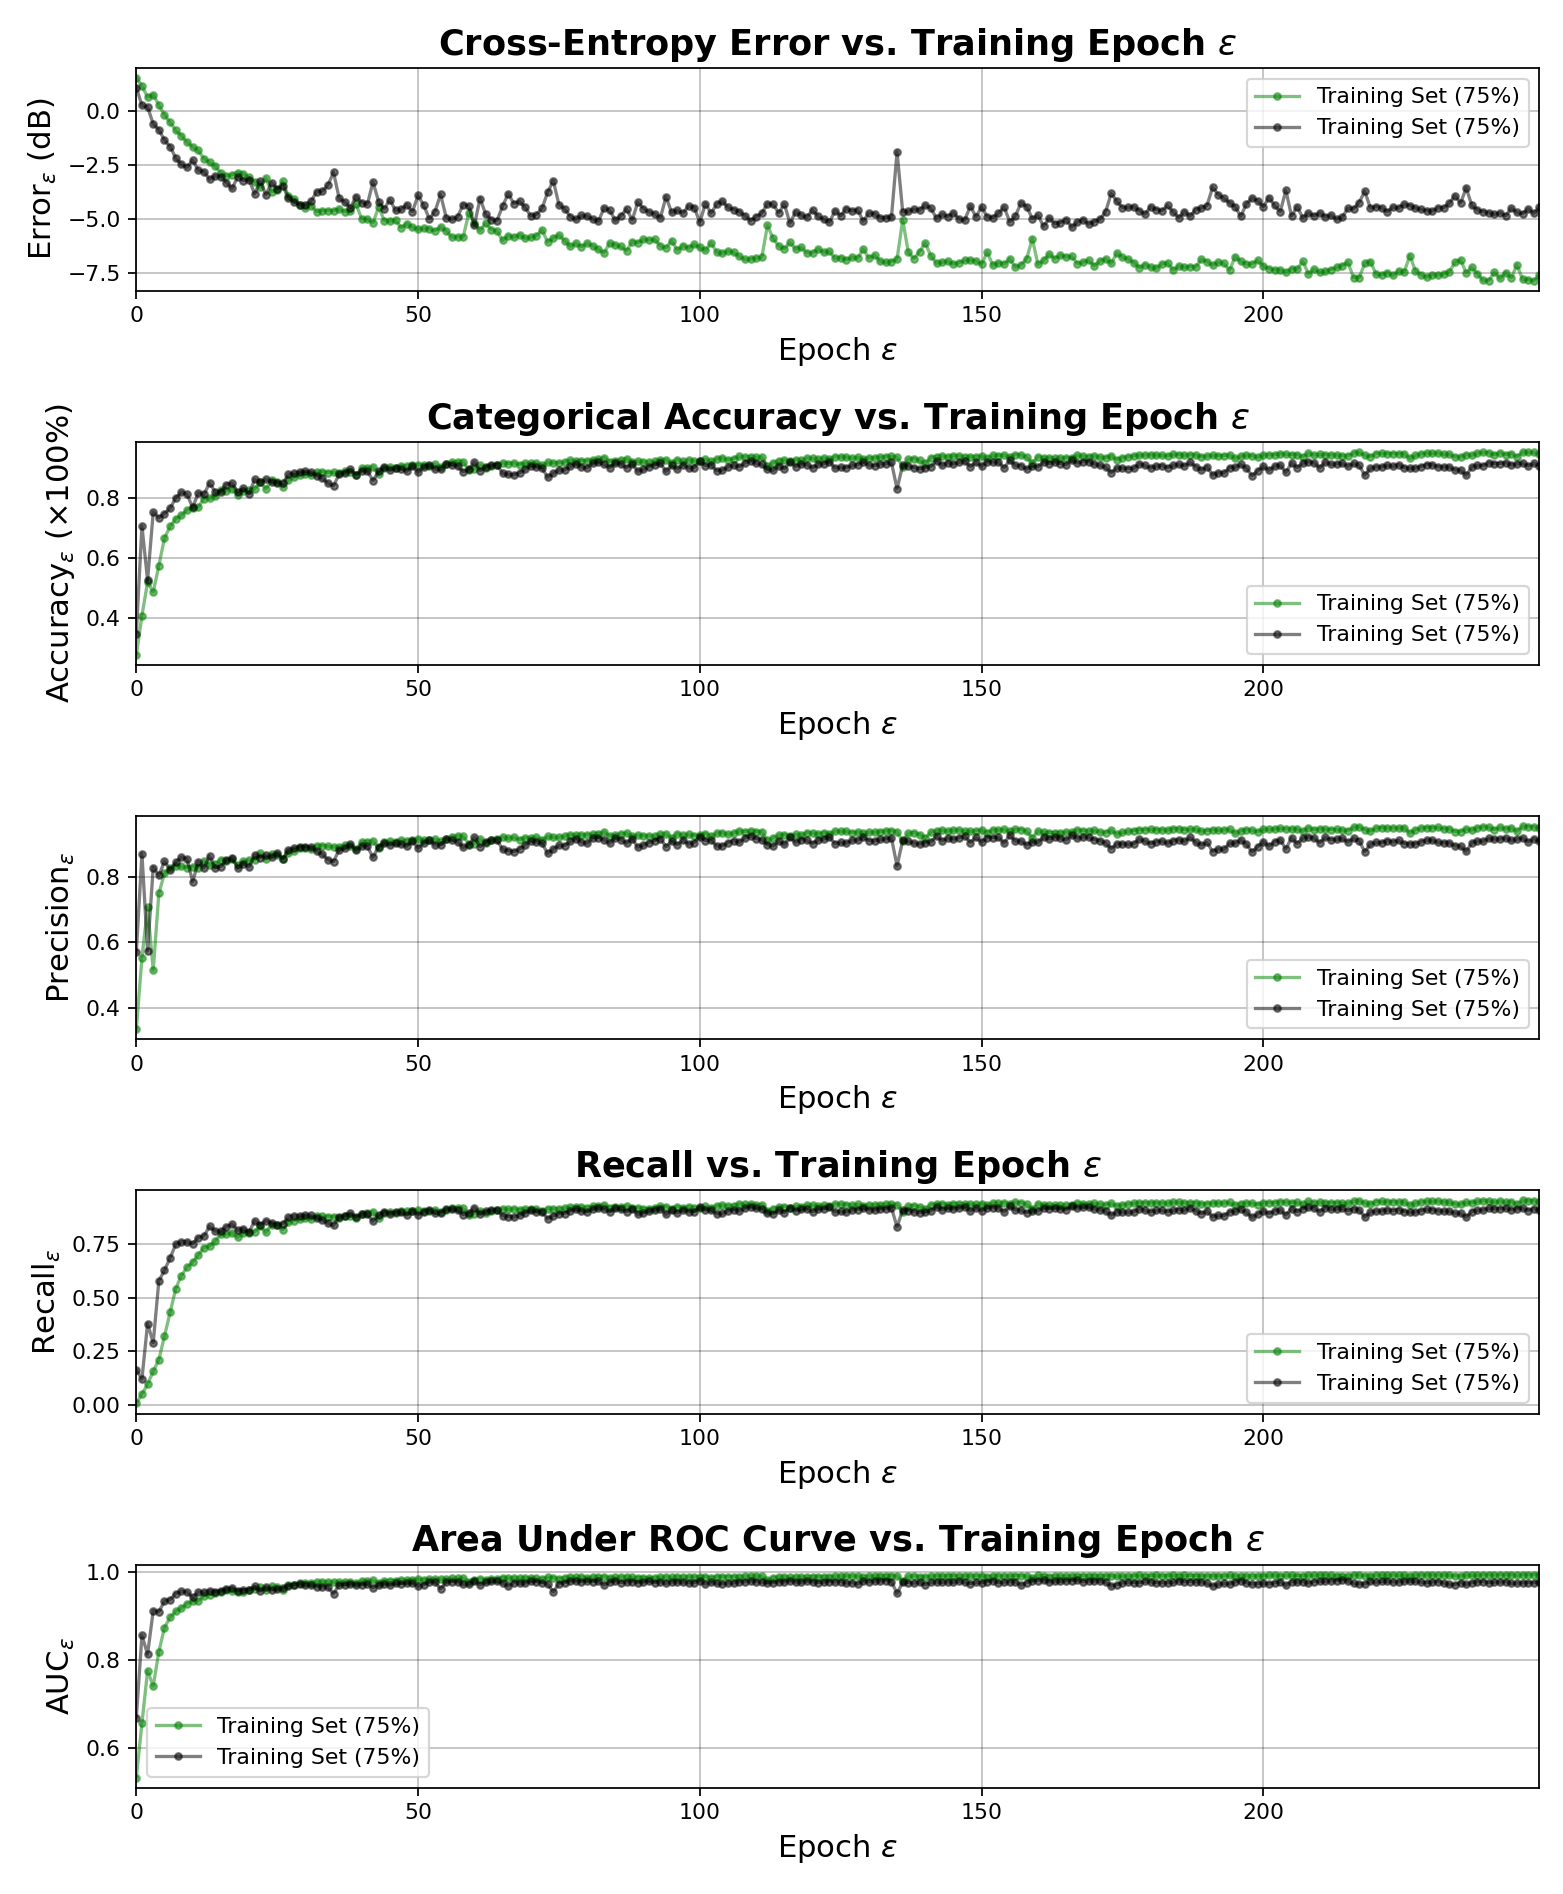

In [10]:
%matplotlib notebook

# Text legend labels for training set curves
train_set_lbl = ('Training Set (' + 
    str(int(100 * (1 - pct_validation))) + '%)');
    
# Text legend labels for validation set curves
val_set_lbl = ('Training Set (' + 
    str(int(100 * (1 - pct_validation))) + '%)');

# New figure
loss_fig = plt.figure(figsize=(9.9,12));

#############
# Loss plot #
#############
ax1 = plt.subplot(5,1,1);

# Add grid to axes
plt.grid(color='k',alpha=0.25);

# Linear grid of training epochs
epochs = arange(0,N_epoch);

# Cross-entropy error (dB) - training set
plt.plot(epochs,10 * log10(
    model.history.history['loss']),
    '.-',c='g',alpha=0.5,
    label=train_set_lbl);

# Cross-entropy error (dB) - validation set
plt.plot(epochs,10 * log10(
    model.history.history['val_loss']),
    '.-',c='k',alpha=0.5,
    label=val_set_lbl);

# Set x-axis limits
plt.xlim([epochs[0],epochs[-1]]);

# Title
plt.title(r'Cross-Entropy Error vs. Training Epoch $\varepsilon$',
          fontsize=16,weight='bold');

# x-axis label
plt.xlabel(r'Epoch $\varepsilon$',fontsize=14);

# y-axis label
plt.ylabel(r'Error${}_{\varepsilon}$ (dB)',fontsize=14);

# Legend
plt.legend();

#################
# Accuracy plot #
#################
plt.subplot(5,1,2,sharex=ax1);

# Add grid to axes
plt.grid(color='k',alpha=0.25);

# Cross-entropy error (dB) - training set
plt.plot(epochs,model.history.history['categorical_accuracy'],
    '.-',c='g',alpha=0.5,label=train_set_lbl);

# Cross-entropy error (dB) - validation set
plt.plot(epochs,model.history.history['val_categorical_accuracy'],
    '.-',c='k',alpha=0.5,label=val_set_lbl);

# Set x-axis limits
plt.xlim([epochs[0],epochs[-1]]);

# Title
plt.title(r'Categorical Accuracy vs. Training Epoch $\varepsilon$',
          fontsize=16,weight='bold');

# x-axis label
plt.xlabel(r'Epoch $\varepsilon$',fontsize=14);

# y-axis label
plt.ylabel(r'Accuracy${}_{\varepsilon}$ ($\times100\%$)',fontsize=14);

# Legend
plt.legend();

##################
# Precision plot #
##################
plt.subplot(5,1,3,sharex=ax1);

# Add grid to axes
plt.grid(color='k',alpha=0.25);

# Cross-entropy error (dB) - training set
plt.plot(epochs,model.history.history['precision'],
    '.-',c='g',alpha=0.5,label=train_set_lbl);

# Cross-entropy error (dB) - validation set
plt.plot(epochs,model.history.history['val_precision'],
    '.-',c='k',alpha=0.5,label=val_set_lbl);

# Set x-axis limits
plt.xlim([epochs[0],epochs[-1]]); 

# x-axis label
plt.xlabel(r'Epoch $\varepsilon$',fontsize=14);

# y-axis label
plt.ylabel(r'Precision${}_{\varepsilon}$',fontsize=14);

# Legend
plt.legend();

###############
# Recall plot #
###############
plt.subplot(5,1,4,sharex=ax1);

# Add grid to axes
plt.grid(color='k',alpha=0.25);

# Cross-entropy error (dB) - training set
plt.plot(epochs,model.history.history['recall'],
    '.-',c='g',alpha=0.5,label=train_set_lbl);

# Cross-entropy error (dB) - validation set
plt.plot(epochs,model.history.history['val_recall'],
    '.-',c='k',alpha=0.5,label=val_set_lbl);

# Set x-axis limits
plt.xlim([epochs[0],epochs[-1]]);

# Title
plt.title(r'Recall vs. Training Epoch $\varepsilon$',
          fontsize=16,weight='bold');

# x-axis label
plt.xlabel(r'Epoch $\varepsilon$',fontsize=14);

# y-axis label
plt.ylabel(r'Recall${}_{\varepsilon}$',fontsize=14);

# Legend
plt.legend();

############
# AUC plot #
############
plt.subplot(5,1,5,sharex=ax1);

# Add grid to axes
plt.grid(color='k',alpha=0.25);

# Cross-entropy error (dB) - training set
plt.plot(epochs,model.history.history['auc'],
    '.-',c='g',alpha=0.5,label=train_set_lbl);

# Cross-entropy error (dB) - validation set
plt.plot(epochs,model.history.history['val_auc'],
    '.-',c='k',alpha=0.5,label=val_set_lbl);

# Set x-axis limits
plt.xlim([epochs[0],epochs[-1]]);

# Title
plt.title(r'Area Under ROC Curve vs. Training Epoch $\varepsilon$',
          fontsize=16,weight='bold');

# x-axis label
plt.xlabel(r'Epoch $\varepsilon$',fontsize=14);

# y-axis label
plt.ylabel(r'AUC${}_{\varepsilon}$',fontsize=14);

# Legend
plt.legend();

# Optimize layout
plt.tight_layout();

### $\textbf{Pass Entire Dataset (i.e., Train }\cup\textbf{ Validation) to Model}$

In [11]:
# C x 1 class prediction for entire dataset
Y_hat = model.predict(
    X,                        # Input data
    batch_size=N_batch,       # Batch size
);

# Cast 1-hot class labels as ordinal labels
y_hat = argmax(Y_hat,axis=1); # Predictions
y_true = argmax(Y,axis=1);    # Ground truth

### $\textbf{Confusion Matrix Using Predictions Output Above}$

<IPython.core.display.Javascript object>


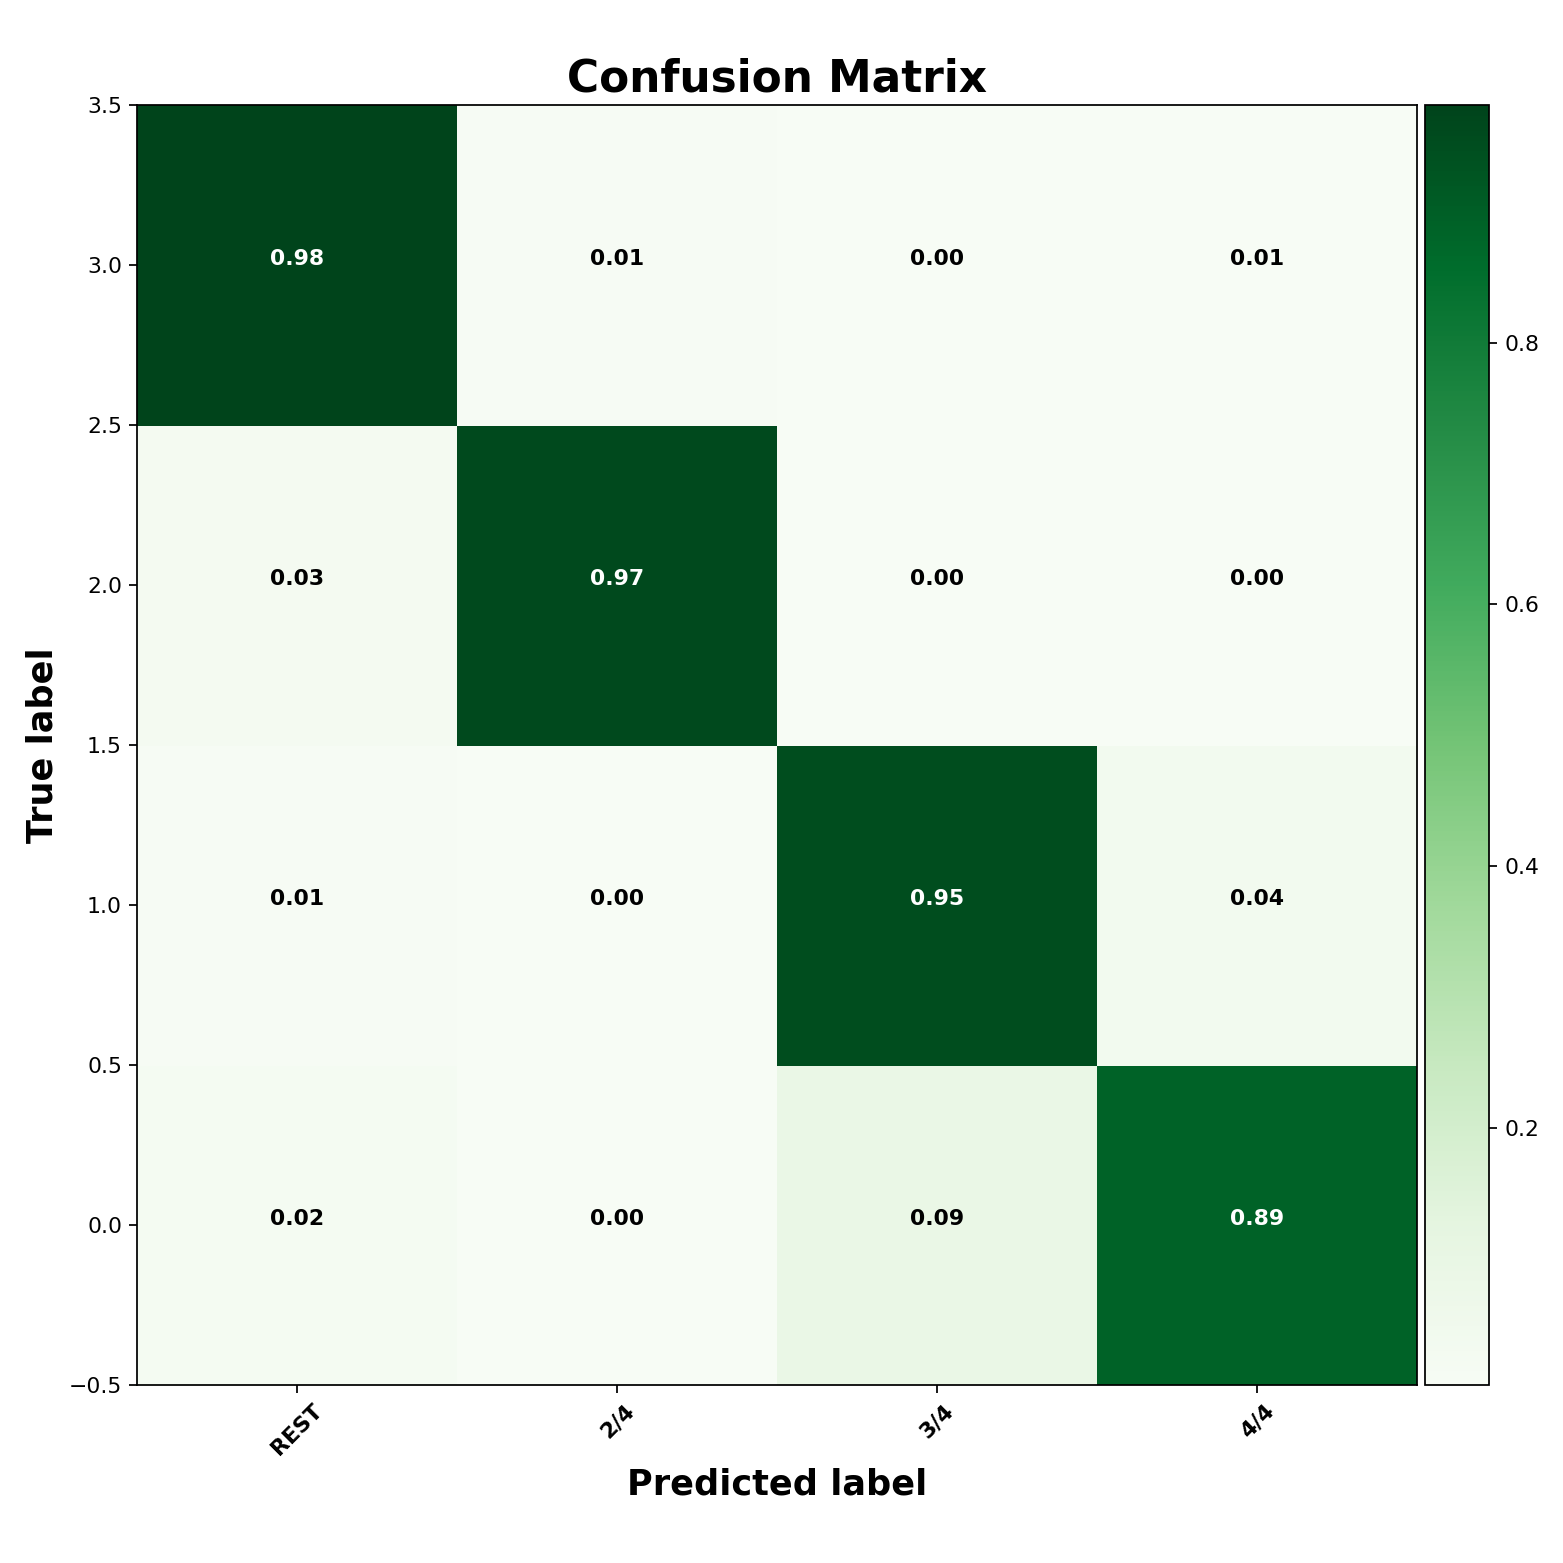

[[0.98166501 0.00891972 0.00396432 0.00545094]
 [0.02586466 0.96541353 0.00390977 0.00481203]
 [0.00986436 0.00320592 0.95191122 0.0350185 ]
 [0.0212     0.0044     0.0878     0.8866    ]]


In [12]:
#########################
#    Compute Matrix:    #
#########################

# Use the sklearn confusion matrix function
confusion_mat = confusion_matrix(y_true,y_hat,
    labels=[c for c in range(C)],sample_weight=None);

#########################
#   Confusion Plotter:  # - adapated from online example
#########################

def plot_confusion_matrix(C,classes,normalize=False,
            title='Confusion matrix',cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    # Let epsilon > 0 be small...
    epsilon = 1e-7;
    
    # Normalization of confusion matrix C
    if normalize:
        C = C.astype('float') / (epsilon + C.sum(axis=1)[:, newaxis]);

    # Print the matrix C
    print(C);
    
    # Image representation
    ax = plt.gca();   # <-- grab current axes
    C = flipud(C);    # <-- flip horizontally for visualization
    im = ax.imshow(C,cmap=cmap);
    
    # Colorbar
    colorbar(im);
    
    # Title
    plt.title(title,fontsize=20,weight="bold");
    
    # Tick labels
    tick_marks = arange(len(classes));
    plt.xticks(tick_marks, classes, rotation=45,fontweight="bold");
    
    # Overwrite default y-axis limits
    plt.ylim([-0.5,len(classes)-0.5]);

    # Text labels in tiles (i.e., elements)
    fmt = '.2f' if normalize else 'd'
    thresh = C.max() / 2.
    for i, j in iter_prod(range(C.shape[0]), range(C.shape[1])):
        plt.text(j, i, format(C[i, j], fmt),
                 horizontalalignment="center",weight="bold",
                 color="white" if C[i, j] > thresh else "black")

    # x-axis labels
    plt.ylabel('True label',fontsize=16,weight="bold");
    
    # y-axis labels
    plt.xlabel('Predicted label',fontsize=16,weight="bold");
    
    # Set axis layout
    plt.tight_layout();
    
#########################
#    Scale Colorbar:    # - found this online
#########################

def colorbar(mappable):
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax)
    plt.sca(last_axes)
    return cbar

#########################
#    Visualization:     #
#########################

conf_fig = plt.figure(figsize=(9.9,9.9));
plot_confusion_matrix(
    confusion_mat, 
    classes=[clss for clss in class_table],
    normalize=True,
    title='Confusion Matrix',
    cmap=plt.cm.Greens);